In [267]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [282]:
Housing = pd.read_csv("~/Desktop/Nashville_housing_data_2013_2016.csv")

In [283]:
Housing.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [284]:
Housing.isnull().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

In [286]:
Housing.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [287]:
Housing.isnull().sum() # removing missing values.

Unnamed: 0                           0
Unnamed: 0.1                         0
Parcel ID                            0
Land Use                             0
Property Address                     0
Suite/ Condo   #                     0
Property City                        0
Sale Date                            0
Sale Price                           0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Owner Name                           0
Address                              0
City                                 0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
image                                0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built               

In [299]:
Housing.Grade.unique()

array(['C   ', 'B   '], dtype=object)

In [300]:
Housing.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.0
mean,16377.500000,16377.500000,238000.000000,0.330000,5127.000000,121450.000000,129400.000000,250850.000000,1832.500000,1984.500000,2.0,2.500000,0.0
std,12099.304133,12099.304133,52325.901808,0.268701,1981.313201,35991.735162,22203.152929,58194.888092,707.813888,0.707107,0.0,0.707107,0.0
min,7822.000000,7822.000000,201000.000000,0.140000,3726.000000,96000.000000,113700.000000,209700.000000,1332.000000,1984.000000,2.0,2.000000,0.0
25%,12099.750000,12099.750000,219500.000000,0.235000,4426.500000,108725.000000,121550.000000,230275.000000,1582.250000,1984.250000,2.0,2.250000,0.0
50%,16377.500000,16377.500000,238000.000000,0.330000,5127.000000,121450.000000,129400.000000,250850.000000,1832.500000,1984.500000,2.0,2.500000,0.0
75%,20655.250000,20655.250000,256500.000000,0.425000,5827.500000,134175.000000,137250.000000,271425.000000,2082.750000,1984.750000,2.0,2.750000,0.0
max,24933.000000,24933.000000,275000.000000,0.520000,6528.000000,146900.000000,145100.000000,292000.000000,2333.000000,1985.000000,2.0,3.000000,0.0


In [290]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 7822 to 24933
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2 non-null      int64  
 1   Unnamed: 0.1                       2 non-null      int64  
 2   Parcel ID                          2 non-null      object 
 3   Land Use                           2 non-null      object 
 4   Property Address                   2 non-null      object 
 5   Suite/ Condo   #                   2 non-null      object 
 6   Property City                      2 non-null      object 
 7   Sale Date                          2 non-null      object 
 8   Sale Price                         2 non-null      int64  
 9   Legal Reference                    2 non-null      object 
 10  Sold As Vacant                     2 non-null      object 
 11  Multiple Parcels Involved in Sale  2 non-null      obje

In [291]:
Housing['Sale Price'].describe()

count         2.000000
mean     238000.000000
std       52325.901808
min      201000.000000
25%      219500.000000
50%      238000.000000
75%      256500.000000
max      275000.000000
Name: Sale Price, dtype: float64

In [301]:
len(Housing['Address'].unique().tolist()) #dropping as the num count is high

2

In [302]:
len(Housing['Land Use'].unique().tolist()) # drop this column

1

In [303]:
len(Housing['Exterior Wall'].unique().tolist())

2

In [317]:
Housing = Housing.drop(['Address','Land Use','Unnamed: 0','Exterior Wall'], axis

SyntaxError: unexpected EOF while parsing (<ipython-input-317-d74acdb97b7e>, line 1)

In [318]:
Housing.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
7822,7822,7822,118 09 0 252.00,ZERO LOT LINE,1129 CLIFTON LN,3-B,NASHVILLE,2013-09-04,201000,20130909-0094904,...,113700.0,209700.0,1332.0,CRAWL,1984.0,BRICK,C,2.0,3.0,0.0
24933,24933,24933,159 00 0 205.00,ZERO LOT LINE,1245 OLD HICKORY BLVD,2-A,BRENTWOOD,2014-12-12,275000,20141217-0115474,...,145100.0,292000.0,2333.0,CRAWL,1985.0,FRAME,B,2.0,2.0,0.0


In [319]:
Housing = pd.get_dummies(Housing, columns=['Grade','Sold As Vacant','Multiple Parcels Involved in Sale]

SyntaxError: EOL while scanning string literal (<ipython-input-319-1fae2a63174e>, line 1)

In [320]:
Housing.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
7822,7822,7822,118 09 0 252.00,ZERO LOT LINE,1129 CLIFTON LN,3-B,NASHVILLE,2013-09-04,201000,20130909-0094904,...,113700.0,209700.0,1332.0,CRAWL,1984.0,BRICK,C,2.0,3.0,0.0
24933,24933,24933,159 00 0 205.00,ZERO LOT LINE,1245 OLD HICKORY BLVD,2-A,BRENTWOOD,2014-12-12,275000,20141217-0115474,...,145100.0,292000.0,2333.0,CRAWL,1985.0,FRAME,B,2.0,2.0,0.0


In [321]:
Housing['Sale Date'] = pd.to_datetime(Housing['Sale Date'])
Housing['Sale Year'] = Housing['Sale Date'].dt.year# Converting and extracting

In [322]:
Housing.shape

(2, 32)

In [323]:
#Housing['Year_Built'] = pd.to_datetime(Housing['Year Built'],format= %Y)

In [324]:
Housing['Age']= Housing['Sale Year']- Housing['Year Built']

In [325]:
#Housing[]

In [326]:
Housing['Diff_SP&TV']= Housing['Sale Price'] - Housing['Total Value']

In [327]:
Housing.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Age,Diff_SP&TV
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.0,2.000000,2.0,2.000000
mean,16377.500000,16377.500000,238000.000000,0.330000,5127.000000,121450.000000,129400.000000,250850.000000,1832.500000,1984.500000,2.0,2.500000,0.0,2013.500000,29.0,-12850.000000
std,12099.304133,12099.304133,52325.901808,0.268701,1981.313201,35991.735162,22203.152929,58194.888092,707.813888,0.707107,0.0,0.707107,0.0,0.707107,0.0,5868.986284
min,7822.000000,7822.000000,201000.000000,0.140000,3726.000000,96000.000000,113700.000000,209700.000000,1332.000000,1984.000000,2.0,2.000000,0.0,2013.000000,29.0,-17000.000000
25%,12099.750000,12099.750000,219500.000000,0.235000,4426.500000,108725.000000,121550.000000,230275.000000,1582.250000,1984.250000,2.0,2.250000,0.0,2013.250000,29.0,-14925.000000
50%,16377.500000,16377.500000,238000.000000,0.330000,5127.000000,121450.000000,129400.000000,250850.000000,1832.500000,1984.500000,2.0,2.500000,0.0,2013.500000,29.0,-12850.000000
75%,20655.250000,20655.250000,256500.000000,0.425000,5827.500000,134175.000000,137250.000000,271425.000000,2082.750000,1984.750000,2.0,2.750000,0.0,2013.750000,29.0,-10775.000000
max,24933.000000,24933.000000,275000.000000,0.520000,6528.000000,146900.000000,145100.000000,292000.000000,2333.000000,1985.000000,2.0,3.000000,0.0,2014.000000,29.0,-8700.000000


In [328]:
Housing['Sale Price'].mean()

238000.0

In [329]:
DiffVal_mean = Housing['Diff_SP&TV'].mean()
print(DiffVal_mean)

-12850.0


In [330]:
: DiffVal_median = Housing['Diff_SP&TV'].median()
print(DiffVal_median)

SyntaxError: invalid syntax (<ipython-input-330-5e1606c1b4ff>, line 1)

In [331]:
Housing.get('OverUnderValue')

In [332]:
def OverUnderValue(Housing):
 if Housing['Diff_SP&TV'] >= 28200.0:
 return 1
 else :
 return 0

Housing['OverUnderValue'] = Housing.apply(lambda Housing:OverUnderValue(Housing
 axis =1)

IndentationError: expected an indented block (<ipython-input-332-2452a3841ef6>, line 3)

<AxesSubplot:ylabel='Frequency'>

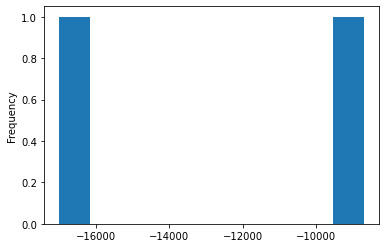

In [333]:
Housing['Diff_SP&TV'].plot.hist()

<AxesSubplot:>

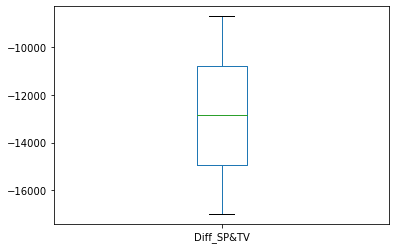

In [334]:
Housing['Diff_SP&TV'].plot.box()

In [335]:
q1 = Housing['Diff_SP&TV'].quantile(.25)
q3 = Housing['Diff_SP&TV'].quantile(.75)
QtrR = q3 - q1
cutoff = 1.5*QtrR
Housing = Housing[((Housing['Diff_SP&TV']) > q1 - cutoff)]
Housing = Housing[((Housing['Diff_SP&TV']) < q3 + cutoff)]

In [336]:
Housing['OverUnderValue'].value_counts()

KeyError: 'OverUnderValue'

In [337]:
len(Housing['OverUnderValue'])

KeyError: 'OverUnderValue'

In [338]:
#Housing['OverUnderValue']= Housing.groupby(by='Diff_SP&TV').median()

In [339]:
Housing

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Age,Diff_SP&TV
7822,7822,7822,118 09 0 252.00,ZERO LOT LINE,1129 CLIFTON LN,3-B,NASHVILLE,2013-09-04,201000,20130909-0094904,...,CRAWL,1984.0,BRICK,C,2.0,3.0,0.0,2013,29.0,-8700.0
24933,24933,24933,159 00 0 205.00,ZERO LOT LINE,1245 OLD HICKORY BLVD,2-A,BRENTWOOD,2014-12-12,275000,20141217-0115474,...,CRAWL,1985.0,FRAME,B,2.0,2.0,0.0,2014,29.0,-17000.0


In [340]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 7822 to 24933
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         2 non-null      int64         
 1   Unnamed: 0.1                       2 non-null      int64         
 2   Parcel ID                          2 non-null      object        
 3   Land Use                           2 non-null      object        
 4   Property Address                   2 non-null      object        
 5   Suite/ Condo   #                   2 non-null      object        
 6   Property City                      2 non-null      object        
 7   Sale Date                          2 non-null      datetime64[ns]
 8   Sale Price                         2 non-null      int64         
 9   Legal Reference                    2 non-null      object        
 10  Sold As Vacant                     

In [341]:
Housing.corr()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Age,Diff_SP&TV
Unnamed: 0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Unnamed: 0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Sale Price,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Acreage,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Neighborhood,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Land Value,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Building Value,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Total Value,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Finished Area,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0
Year Built,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,-1.0,NaN,1.0,NaN,-1.0


In [342]:
Housing = Housing.drop(['Sale Date'], axis = 1, inplace = False)

In [343]:
#Housing = Housing.drop(['Year Built'], axis = 1, inplace = False)

In [344]:
Housing = Housing.drop(['Land Value'], axis = 1, inplace = False)

In [345]:
Housing = Housing.drop(['Building Value'], axis = 1, inplace = False)

In [346]:
Housing = Housing.drop(['Total Value'], axis = 1, inplace = False)

In [347]:
Housing = Housing.drop(['Sale Year'], axis = 1, inplace = False)

In [348]:
Housing = Housing.drop(['Acreage'], axis = 1, inplace = False)

In [349]:
Housing = Housing.drop(['Finished Area'], axis = 1, inplace = False)

In [350]:
Housing = Housing.drop(['Half Bath'], axis = 1, inplace = False)

In [351]:
Housing = Housing.drop(['Bedrooms'], axis = 1, inplace = False)

In [352]:
Housing = Housing.drop(['Full Bath'], axis = 1, inplace = False)

In [353]:
Housing = Housing.drop(['Sale Price'], axis = 1, inplace = False)

In [354]:
Housing = Housing.drop(['Sale Year'], axis = 1, inplace = False)

KeyError: "['Sale Year'] not found in axis"

In [355]:
Housing = Housing.drop(['Diff_SP&TV'], axis = 1, inplace = False)

In [356]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 7822 to 24933
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2 non-null      int64  
 1   Unnamed: 0.1                       2 non-null      int64  
 2   Parcel ID                          2 non-null      object 
 3   Land Use                           2 non-null      object 
 4   Property Address                   2 non-null      object 
 5   Suite/ Condo   #                   2 non-null      object 
 6   Property City                      2 non-null      object 
 7   Legal Reference                    2 non-null      object 
 8   Sold As Vacant                     2 non-null      object 
 9   Multiple Parcels Involved in Sale  2 non-null      object 
 10  Owner Name                         2 non-null      object 
 11  Address                            2 non-null      obje

In [357]:
#Logistic Regression model
y=Housing[['OverUnderValue']] # sperating dependent and independent variables
x=Housing.drop(columns=['OverUnderValue'])

KeyError: "None of [Index(['OverUnderValue'], dtype='object')] are in the [columns]"

In [358]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state

SyntaxError: unexpected EOF while parsing (<ipython-input-358-e61ea8a57dbd>, line 1)

In [359]:
x_train

NameError: name 'x_train' is not defined

In [360]:
model=LogisticRegression(solver='liblinear',random_state=1).fit(x_train,y_train
model.score(x_train,y_train)

SyntaxError: invalid syntax (<ipython-input-360-d4d6c14b617f>, line 2)

In [361]:
type(y_train)

NameError: name 'y_train' is not defined

In [362]:
y_test

NameError: name 'y_test' is not defined

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [364]:
y_pred_logreg = logreg.predict(x_test)

NameError: name 'x_test' is not defined

In [365]:
accuracy_score(y_test, y_pred_logreg)

NameError: name 'accuracy_score' is not defined

In [366]:
#with adding constants
import statsmodels.api as sm
x_trainLogr = sm.add_constant(x_train)
logit_modelLogr=sm.Logit(y_train,x_trainLogr)
resultLogr =logit_modelLogr.fit()
print(resultLogr.summary2())

NameError: name 'x_train' is not defined

In [367]:
resultLogr.score(x_train,y_train)

NameError: name 'resultLogr' is not defined

In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(
 x, y, test_size=0.2, stratify=y, random_state=2)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.Logit(Y_train, X_train)
fit = model.fit() # error appears on this line
fit.summary2()

NameError: name 'x' is not defined

In [369]:
y_test.shape

NameError: name 'y_test' is not defined

In [370]:
X_test.shape

NameError: name 'X_test' is not defined

In [371]:
y_pred = fit.predict(X_test)

NameError: name 'fit' is not defined

In [372]:
y_pred_binary = [0 if x < 0.5 else 1 for x in y_pred]

NameError: name 'y_pred' is not defined

In [373]:
print(classification_report(y_test,y_pred_binary))

NameError: name 'y_test' is not defined

In [374]:
accuracy_score(y_test, y_pred_binary)

NameError: name 'accuracy_score' is not defined

In [375]:
import statsmodels.api as sm
logm2 = sm.GLM(y_train,x_train,family = sm.families.Binomial(),random_state=10

SyntaxError: unexpected EOF while parsing (<ipython-input-375-d04b583b95e4>, line 2)

In [376]:
result = logm2.fit()

NameError: name 'logm2' is not defined

In [377]:
result.summary()

NameError: name 'result' is not defined

In [378]:
y_pred_glm = result.predict(x_test)

NameError: name 'result' is not defined

In [379]:
y_pred_glm_bnary = [0 if x < 0.5 else 1 for x in y_pred_glm]

NameError: name 'y_pred_glm' is not defined

In [380]:
accuracy_score(y_test, y_pred_glm_bnary)

NameError: name 'accuracy_score' is not defined

In [381]:
#DecisionTree Classifier

In [382]:
from sklearn import tree
treemodel = DecisionTreeClassifier(max_depth=2)
treemodel.fit(x_train,y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [383]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
#tree.plot_tree(clf)

NameError: name 'DecisionTreeClassifier' is not defined

In [384]:
y_pred2 = clf.predict(x_test)
y_pred2 = [0 if x < 0.5 else 1 for x in y_pred2]

NameError: name 'x_test' is not defined

In [385]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

NameError: name 'y_test' is not defined

In [386]:
print(classification_report(y_test,y_pred2))# Decicision Tree Values

NameError: name 'y_test' is not defined

In [387]:
# Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier

In [389]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [390]:
y_pred = rfc.predict(x_test)

NameError: name 'x_test' is not defined

In [391]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_

SyntaxError: unexpected EOF while parsing (<ipython-input-391-f4aabaaa7b1c>, line 2)

In [392]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [393]:
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [394]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

NameError: name 'y_test' is not defined

In [395]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [396]:
# Gradient Boosting Model

In [397]:
#
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redu# summarize the dataset
print(X.shape, y.shape)

SyntaxError: invalid syntax (<ipython-input-397-a8525aa44c80>, line 6)

In [398]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [399]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [400]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [401]:
gradient_booster.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [402]:
print(classification_report(y_test,gradient_booster.predict(x_test)))

NameError: name 'y_test' is not defined